*Charlotte Kaiser, Master Thesis, Degree of MPP - The Hertie School Class of 2022* May 2, 2022
### Practicing and prepping code, writing templates for functions
---

In [2]:
import numpy as np
import pandas as pd
import nltk
import matplotlib

In [3]:
nltk.download() # open the nltk book collection

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

---
#### 1   Computing with Language: Texts and Words

In [5]:
from nltk.book import * # loading all items from book download

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [6]:
text1 # examining the texts
text2

<Text: Sense and Sensibility by Jane Austen 1811>

---
##### 1.1 Searching Text

In [7]:
text1.concordance("monstrous") # A concordance view shows us every occurrence of a given word, together with some context. 

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


In [8]:
text7.concordance("money") #A concordance permits us to see words in context. For example, we saw that monstrous occurred in contexts such as the ___ pictures and a ___ size 


Displaying 25 of 60 matches:
00 taxable funds tracked * by IBC 's Money Fund Report eased a fraction of a pe
*-1 Brenda Malizia Negus , editor of Money Fund Report , yields `` may blip up 
stors continue *-1 to pour cash into money funds . Assets of the 400 taxable fu
go after the highest rates . The top money funds are currently yielding well ov
t forces investors to redeploy their money at lower rates . Second , they chann
heless , plenty of U.S. analysts and money managers are aghast at the lofty tra
ll face legal obstacles to * raising money in the U.S. until they settle hundre
 in September . The goverment counts money as it is spent *-53 ; Dodge counts c
*-54 *T*-1 . The government includes money spent * on residential renovation ; 
Japan . Despite the enormous sums of money 0 they 're paid *T*-1 *-2 to stand u
aduate School of Business . Japanese money will help *-1 turn Southeast Asia in
r hand , bring recognition and extra money -- a new computer lab for a school ,
teaching as

In [9]:
text7.similar("money") # What other words appear in a similar range of contexts? We can find out by appending the term similar to the name of the text in question, then inserting the relevant word in parentheses:

the it million general capital free stocks board and industrial more
billion men common other funds dividends assets management seats


Observe that we get different results for different texts. Austen uses this word quite differently from Melville; for her, monstrous has positive connotations, and sometimes functions as an intensifier like the word very.

- Check out what other words instead of privacy or homeland or AI are used etc!

In [10]:
text2.common_contexts(["monstrous", "very"])

am_glad a_pretty a_lucky is_pretty be_glad


In [11]:
text7.common_contexts(["money", "capital"]) # The term common_contexts allows us to examine just the contexts that are shared by two or more words, such as monstrous and very. We have to enclose these words by square brackets as well as parentheses, and separate them with a comma:

of_and of_says


It is one thing to automatically detect that a particular word occurs in a text, and to display some words that appear in the same context. However, we can also determine the location of a word in the text: how many words from the beginning it appears. This positional information can be displayed using a dispersion plot. Each stripe represents an instance of a word, and each row represents the entire text. In 1.2 we see some striking patterns of word usage over the last 220 years (in an artificial text constructed by joining the texts of the Inaugural Address Corpus end-to-end). You can produce this plot as shown below. You might like to try more words (e.g., liberty, constitution), and different texts. Can you predict the dispersion of a word before you view it? As before, take care to get the quotes, commas, brackets and parentheses exactly right.

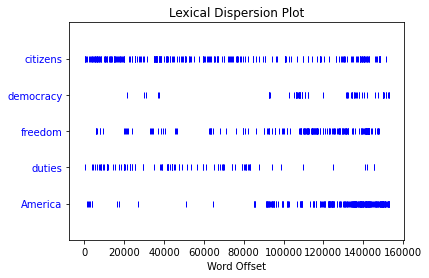

In [12]:
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])

Ok, the next thing is crazy: 

In [13]:
text4.generate() # Now, just for fun, let's try generating some random text in the various styles we have just seen. To do this, we type the name of the text followed by the term generate. (We need to include the parentheses, but there's nothing that goes between them.)

Building ngram index...


objects , and especially the truth that democratic government has
innate capacity to govern its affairs aright through the Province
ceded , by any timid forebodings of evil were not to overtake them
while I possess the property of the pecuniary estimates for the
advancement of civilization . , religion and a reckless disregard of
the Argonne , Omaha Beach , Salerno and halfway around the globe , and
nothing is more important in the House and the special attention of
the Government to interfere with the advice and equipment to free ones
; to the public agents intrusted with


'objects , and especially the truth that democratic government has\ninnate capacity to govern its affairs aright through the Province\nceded , by any timid forebodings of evil were not to overtake them\nwhile I possess the property of the pecuniary estimates for the\nadvancement of civilization . , religion and a reckless disregard of\nthe Argonne , Omaha Beach , Salerno and halfway around the globe , and\nnothing is more important in the House and the special attention of\nthe Government to interfere with the advice and equipment to free ones\n; to the public agents intrusted with'

---
##### 1.2 Counting vocab

In [14]:
len(text3)

44764

So Genesis has 44,764 words and punctuation symbols, or "tokens." A token is the technical name for a sequence of characters — such as hairy, his, or :) — that we want to treat as a group. When we count the number of tokens in a text, say, the phrase to be or not to be, we are counting occurrences of these sequences. Thus, in our example phrase there are two occurrences of to, two of be, and one each of or and not. But there are only four distinct vocabulary items in this phrase. How many distinct words does the book of Genesis contain? To work this out in Python, we have to pose the question slightly differently. The vocabulary of a text is just the set of tokens that it uses, since in a set, all duplicates are collapsed together. In Python we can obtain the vocabulary items of text3 with the command: set(text3). When you do this, many screens of words will fly past. Now try the following:

In [15]:
sorted(set(text3))

['!',
 "'",
 '(',
 ')',
 ',',
 ',)',
 '.',
 '.)',
 ':',
 ';',
 ';)',
 '?',
 '?)',
 'A',
 'Abel',
 'Abelmizraim',
 'Abidah',
 'Abide',
 'Abimael',
 'Abimelech',
 'Abr',
 'Abrah',
 'Abraham',
 'Abram',
 'Accad',
 'Achbor',
 'Adah',
 'Adam',
 'Adbeel',
 'Admah',
 'Adullamite',
 'After',
 'Aholibamah',
 'Ahuzzath',
 'Ajah',
 'Akan',
 'All',
 'Allonbachuth',
 'Almighty',
 'Almodad',
 'Also',
 'Alvah',
 'Alvan',
 'Am',
 'Amal',
 'Amalek',
 'Amalekites',
 'Ammon',
 'Amorite',
 'Amorites',
 'Amraphel',
 'An',
 'Anah',
 'Anamim',
 'And',
 'Aner',
 'Angel',
 'Appoint',
 'Aram',
 'Aran',
 'Ararat',
 'Arbah',
 'Ard',
 'Are',
 'Areli',
 'Arioch',
 'Arise',
 'Arkite',
 'Arodi',
 'Arphaxad',
 'Art',
 'Arvadite',
 'As',
 'Asenath',
 'Ashbel',
 'Asher',
 'Ashkenaz',
 'Ashteroth',
 'Ask',
 'Asshur',
 'Asshurim',
 'Assyr',
 'Assyria',
 'At',
 'Atad',
 'Avith',
 'Baalhanan',
 'Babel',
 'Bashemath',
 'Be',
 'Because',
 'Becher',
 'Bedad',
 'Beeri',
 'Beerlahairoi',
 'Beersheba',
 'Behold',
 'Bela',
 'Belah

In [16]:
len(set(text3))

2789

By wrapping sorted() around the Python expression set(text3) [1], we obtain a sorted list of vocabulary items, beginning with various punctuation symbols and continuing with words starting with A. All capitalized words precede lowercase words. We discover the size of the vocabulary indirectly, by asking for the number of items in the set, and again we can use len to obtain this number [2]. Although it has 44,764 tokens, this book has only 2,789 distinct words, or "word types." A word type is the form or spelling of the word independently of its specific occurrences in a text — that is, the word considered as a unique item of vocabulary. Our count of 2,789 items will include punctuation symbols, so we will generally call these unique items types instead of word types.

In [17]:
len(set(text3)) / len(text3)

0.06230453042623537

Next, let's focus on particular words. We can count how often a word occurs in a text, and compute what percentage of the text is taken up by a specific word:

In [18]:
text4.count("freedom")
100 * text4.count("freedom") / len(text4)

0.1177232326799694

In [19]:
text5.count("lol")
100 * text5.count('lol') / len(text5)

1.5640968673628082

You may want to repeat such calculations on several texts, but it is tedious to keep retyping the formula. Instead, you can come up with your own name for a task, like "lexical_diversity" or "percentage", and associate it with a block of code. Now you only have to type a short name instead of one or more complete lines of Python code, and you can re-use it as often as you like. The block of code that does a task for us is called a function, and we define a short name for our function with the keyword def. The next example shows how to define two new functions, lexical_diversity() and  percentage():

In [20]:
def lexical_diversity(text):
    return len(set(text)) / len(text)

In [21]:
def percentage(count, total): 
    return 100 * count / total

In the definition of lexical_diversity() [1], we specify a parameter named text . This parameter is a "placeholder" for the actual text whose lexical diversity we want to compute, and reoccurs in the block of code that will run when the function is used [2]. Similarly, percentage() is defined to take two parameters, named count and total [3].

Once Python knows that lexical_diversity() and percentage() are the names for specific blocks of code, we can go ahead and use these functions:

In [22]:
lexical_diversity(text3)

0.06230453042623537

To recap, we use or call a function such as lexical_diversity() by typing its name, followed by an open parenthesis, the name of the text, and then a close parenthesis. These parentheses will show up often; their role is to separate the name of a task — such as lexical_diversity() — from the data that the task is to be performed on — such as text3. The data value that we place in the parentheses when we call a function is an argument to the function.

You have already encountered several functions in this chapter, such as len(), set(), and sorted(). By convention, we will always add an empty pair of parentheses after a function name, as in len(), just to make clear that what we are talking about is a function rather than some other kind of Python expression. Functions are an important concept in programming, and we only mention them at the outset to give newcomers a sense of the power and creativity of programming. Don't worry if you find it a bit confusing right now.

In [25]:
percentage(4, 5) # 4 is count, 5 is total -> makes sense

80.0

---
#### 2 A Closer Look at Python: Texts as Lists of Words
##### 2.1   Lists
 Some more lists have been defined for you, one for the opening sentence of each of our texts, sent2 … sent9. We inspect two of them here; you can see the rest for yourself using the Python interpreter (if you get an error which says that sent2 is not defined, you need to first type from nltk.book import *).

In [26]:
sent2

['The',
 'family',
 'of',
 'Dashwood',
 'had',
 'long',
 'been',
 'settled',
 'in',
 'Sussex',
 '.']

In [28]:
newlist = ["Hi", "my", "name", "is", "Charlotte", "and", "I", "love", "Julius"]
newlist

['Hi', 'my', 'name', 'is', 'Charlotte', 'and', 'I', 'love', 'Julius']

In [32]:
len(newlist)
sorted(newlist)
newlist.count("my")

1

In [33]:
newlist + sent4 #concatenation

['Hi',
 'my',
 'name',
 'is',
 'Charlotte',
 'and',
 'I',
 'love',
 'Julius',
 'Fellow',
 '-',
 'Citizens',
 'of',
 'the',
 'Senate',
 'and',
 'of',
 'the',
 'House',
 'of',
 'Representatives',
 ':']

In [38]:
newlist.append(["a", "lot"]) 
newlist.append(["a", "lot"]) # appending
newlist


['Hi',
 'my',
 'name',
 'is',
 'Charlotte',
 'and',
 'I',
 'love',
 'Julius',
 ['a', 'lot'],
 ['a', 'lot'],
 ['a', 'lot']]

In [39]:
newlist.remove(["a", "lot"])
newlist

['Hi',
 'my',
 'name',
 'is',
 'Charlotte',
 'and',
 'I',
 'love',
 'Julius',
 ['a', 'lot'],
 ['a', 'lot']]

---
##### 2.2 Indexing
Analogously, we can identify the elements of a Python list by their order of occurrence in the list. The number that represents this position is the item's index. We instruct Python to show us the item that occurs at an index such as 173 in a text by writing the name of the text followed by the index inside square brackets:

In [40]:
text4[173]

'awaken'

In [41]:
text4.index('awaken') # We can do the converse; given a word, find the index of when it first occurs

173

In [47]:
text4.index("duty")

243

Indexes are a common way to access the words of a text, or, more generally, the elements of any list. Python permits us to access sublists as well, extracting manageable pieces of language from large texts, a technique known as slicing.

In [48]:
text5[16715:16735]

['U86',
 'thats',
 'why',
 'something',
 'like',
 'gamefly',
 'is',
 'so',
 'good',
 'because',
 'you',
 'can',
 'actually',
 'play',
 'a',
 'full',
 'game',
 'without',
 'buying',
 'it']

Indexes have some subtleties, and we'll explore these with the help of an artificial sentence:

In [49]:
sent = ['word1', 'word2', 'word3', 'word4', 'word5','word6', 'word7', 'word8', 'word9', 'word10']

In [50]:
sent[0] # index 0 is element 1. Thus, zero steps forward leaves it at the first element. I.e. element - 1 = index place (n-1)

'word1'

By convention, m:n means elements m…n-1. As the next example shows, we can omit the first number if the slice begins at the start of the list [1], and we can omit the second number if the slice goes to the end 

---
##### 2.3 Variables

**Caution!**

Take care with your choice of names (or identifiers) for Python variables. First, you should start the name with a letter, optionally followed by digits (0 to 9) or letters. Thus, abc23 is fine, but 23abc will cause a syntax error. Names are case-sensitive, which means that myVar and myvar are distinct variables. Variable names cannot contain whitespace, but you can separate words using an underscore, e.g., my_var. Be careful not to insert a hyphen instead of an underscore: my-var is wrong, since Python interprets the "-" as a minus sign.

---
##### 2.4 Strings


In [51]:
name = 'Monty'

In [54]:
name * 4
name + "!"

'Monty!'

We can join the words of a list to make a single string, or split a string into a list, as follows

In [55]:
' '.join(['Monty', 'Python'])

'Monty Python'

In [56]:
'Monty Python'.split()

['Monty', 'Python']

---
#### 3 Computing with Language: Simple Statistics

In this section we pick up the question of what makes a text distinct, and use automatic methods to find characteristic words and expressions of a text. As in 1, you can try new features of the Python language by copying them into the interpreter, and you'll learn about these features systematically in the following section.

Before continuing further, you might like to check your understanding of the last section by predicting the output of the following code. You can use the interpreter to check whether you got it right. If you're not sure how to do this task, it would be a good idea to review the previous section before continuing further.



In [57]:
saying = ['After', 'all', 'is', 'said', 'and', 'done',
         'more', 'is', 'said', 'than', 'done']

In [58]:
tokens = set(saying)

In [59]:
tokens = sorted(tokens) # After all and done done is is more said said than 

In [60]:
tokens[-2:]

['said', 'than']

---
##### 3.1 Freq Distribution

The table in 3.1 is known as a frequency distribution, and it tells us the frequency of each vocabulary item in the text. (In general, it could count any kind of observable event.) It is a "distribution" because it tells us how the total number of word tokens in the text are distributed across the vocabulary items. Since we often need frequency distributions in language processing, NLTK provides built-in support for them. Let's use a FreqDist to find the 50 most frequent words of Moby Dick:

In [64]:
fdist1 = FreqDist(text1)
print(fdist1)
fdist1.most_common(50) # gives us the most frequent items as well as the frequency of their occurence in brackets. 

<FreqDist with 19317 samples and 260819 outcomes>


[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632),
 ('as', 1620),
 ('"', 1478),
 ('all', 1462),
 ('for', 1414),
 ('this', 1280),
 ('!', 1269),
 ('at', 1231),
 ('by', 1137),
 ('but', 1113),
 ('not', 1103),
 ('--', 1070),
 ('him', 1058),
 ('from', 1052),
 ('be', 1030),
 ('on', 1005),
 ('so', 918),
 ('whale', 906),
 ('one', 889),
 ('you', 841),
 ('had', 767),
 ('have', 760),
 ('there', 715),
 ('But', 705),
 ('or', 697),
 ('were', 680),
 ('now', 646),
 ('which', 640),
 ('?', 637),
 ('me', 627),
 ('like', 624)]

When we first invoke FreqDist, we pass the name of the text as an argument [1]. We can inspect the total number of words ("outcomes") that have been counted up [2] — 260,819 in the case of Moby Dick. The expression most_common(50) gives us a list of the 50 most frequently occurring types in the text [3].

In [66]:
fdist4 = FreqDist(text4)
print(fdist4)
fdist4.most_common(50)

<FreqDist with 10025 samples and 152901 outcomes>


[('the', 9555),
 (',', 7275),
 ('of', 7169),
 ('and', 5226),
 ('.', 5011),
 ('to', 4477),
 ('in', 2604),
 ('a', 2229),
 ('our', 2062),
 ('that', 1769),
 ('be', 1505),
 ('is', 1477),
 ('we', 1281),
 ('for', 1141),
 ('by', 1063),
 ('it', 1036),
 ('have', 1029),
 ('which', 1007),
 ('not', 972),
 ('will', 935),
 ('as', 926),
 ('with', 918),
 ('I', 882),
 ('are', 820),
 ('all', 807),
 ('this', 755),
 ('their', 743),
 ('The', 634),
 ('has', 632),
 ('people', 589),
 (';', 573),
 ('its', 562),
 ('or', 559),
 ('We', 557),
 ('from', 545),
 ('on', 521),
 ('but', 507),
 ('us', 502),
 ('been', 496),
 ('can', 484),
 ('my', 472),
 ('no', 419),
 ('an', 388),
 ('who', 376),
 ('must', 373),
 ('so', 369),
 ('It', 366),
 ('upon', 365),
 ('--', 363),
 ('they', 358)]

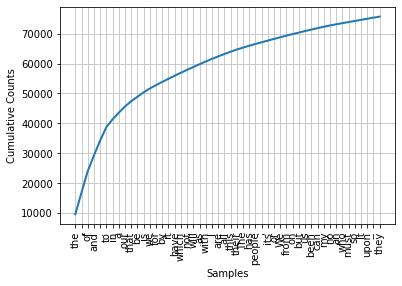

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [68]:
fdist4['people']
fdist4.plot(50, cumulative=True)

What proportion of the text is taken up with such words? We can generate a cumulative frequency plot for these words, using fdist1.plot(50, cumulative=True), to produce the graph in 3.2. These 50 words account for nearly half the book!

In [69]:
fdist4.hapaxes()

['notification',
 '14th',
 'fondest',
 'predilection',
 'flattering',
 'asylum',
 'interruptions',
 'awaken',
 'distrustful',
 'despondence',
 'inheriting',
 'endowments',
 'unpracticed',
 'aver',
 'thence',
 'consulted',
 'disinclination',
 'untried',
 'cares',
 'palliated',
 'mislead',
 'repaired',
 'improper',
 'omit',
 'tendering',
 'homage',
 'adore',
 'Invisible',
 'conducts',
 'token',
 'pious',
 'reflections',
 'auspiciously',
 'acquit',
 'designates',
 'congenial',
 'actuate',
 'rectitude',
 'adorn',
 'behold',
 'misdirect',
 'preeminence',
 'indissoluble',
 'disregards',
 'fifth',
 'juncture',
 'inquietude',
 'discernment',
 'characteristic',
 'impregnably',
 'renounce',
 'inapplicable',
 'emoluments',
 'indispensably',
 'Parent',
 'Race',
 'supplication',
 'deliberating',
 'arrive',
 'Previous',
 'upbraidings',
 'perceived',
 'legislature',
 'apprehensive',
 'fleets',
 'consisting',
 'broke',
 'pieces',
 'rod',
 'models',
 'Batavian',
 'particulars',
 'courier',
 'foreseen',

If the frequent words don't help us, how about the words that occur once only, the so-called hapaxes? View them by typing fdist1.hapaxes(). This list contains lexicographer, cetological, contraband, expostulations, and about 9,000 others. It seems that there are too many rare words, and without seeing the context we probably can't guess what half of the hapaxes mean in any case! Since neither frequent nor infrequent words help, we need to try something else.

---
##### 3.2 Fine-grained Selection of Words
Next, let's look at the long words of a text; perhaps these will be more characteristic and informative. For this we adapt some notation from set theory. We would like to find the words from the vocabulary of the text that are more than 15 characters long. Let's call this property P, so that P(w) is true if and only if w is more than 15 characters long. Now we can express the words of interest using mathematical set notation as shown in (1a). This means "the set of all w such that w is an element of V (the vocabulary) and w has property P".

(1)		
a.		{w | w ∈ V & P(w)}

b.		[w for w in V if p(w)]



In [72]:
V = set(text4)
long_words = [w for w in V if len(w) > 15]
sorted(long_words)

['RESPONSIBILITIES',
 'antiphilosophists',
 'constitutionally',
 'contradistinction',
 'discountenancing',
 'disqualification',
 'enthusiastically',
 'instrumentalities',
 'internationality',
 'irresponsibility',
 'misappropriation',
 'misrepresentation',
 'misunderstanding',
 'responsibilities',
 'sentimentalizing',
 'transcontinental',
 'uncharitableness',
 'unconstitutional']

In [74]:
V = set(text4)
long_words2 = [word for word in V if len(word) > 10]
sorted(long_words2)

['Abandonment',
 'Administered',
 'Administration',
 'Administrations',
 'Afghanistan',
 'Agriculture',
 'Alleghanies',
 'Americanism',
 'Appreciating',
 'Apprehension',
 'Arbitration',
 'Association',
 'Bicentennial',
 'COOPERATION',
 'Christianity',
 'Commendable',
 'Commissioners',
 'Commonwealth',
 'Communications',
 'Confederacy',
 'Confederation',
 'Confidently',
 'Congressional',
 'Congressman',
 'Considering',
 'Constitution',
 'Constitutional',
 'Contemplating',
 'Corporations',
 'Declaration',
 'Departments',
 'Destructive',
 'Disagreement',
 'Discouraging',
 'ENFORCEMENT',
 'Emancipation',
 'Encountering',
 'Encouraging',
 'Enterprises',
 'Establishment',
 'Expenditure',
 'Experiencing',
 'Federalists',
 'Fortunately',
 'Governments',
 'Guadalcanal',
 'INVESTIGATION',
 'Inauguration',
 'Inconsiderable',
 'Independence',
 'Independently',
 'Information',
 'Instinctively',
 'Intelligence',
 'International',
 'Legislation',
 'Legislature',
 'Massachusetts',
 'Mediterranean',
 '

Your Turn: Try out the previous statements in the Python interpreter, and experiment with changing the text and changing the length condition. Does it make a difference to your results if you change the variable names, e.g., using [word for word in vocab if ...]?

- No, doesnt make a difference.

In [76]:
V5 = set(text5)
long_words5 = [w for w in V5 if len(w) > 15]
sorted(long_words5)

['!!!!!!!!!!!!!!!!',
 '!!!!!!!!!!!!!!!!!!!!!!',
 '!!!!!!!!!!!!!!!!!!!!!!!',
 '!!!!!!!!!!!!!!!!!!!!!!!!!!!',
 '!!!!!!!!!!!!!!!!!!!!!!!!!!!!',
 '!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!',
 '#talkcity_adults',
 '(((((((((((((((((',
 '((((((((((((((((((',
 '((((((((((((((((((((',
 '(((((((((((((((((((((',
 '(((((((((((((((((((((((',
 '((((((((((((((((((((((((',
 '(((((((((((((((((((((((((',
 '((((((((((((((((((((((((((',
 ')))))))))))))))))',
 ')))))))))))))))))))',
 ')))))))))))))))))))))',
 '))))))))))))))))))))))',
 '))))))))))))))))))))))))))))',
 ')))))))))))))))))))))))))))))))',
 '--------------------',
 '.(..(.vMp3 v1.7.4.).)',
 '.(..(.vMp3 vi.p.t.)..).',
 '................',
 '..................',
 '...................',
 '....................',
 '........................',
 '..............................',
 '.A.n.a.c.?.n.?.a.',
 '//www.wunderground.com/cgi-bin/findweather/getForecast?query=95953#FIR',
 '<3333333333333333',
 '<33333333333333333',
 'BAAAAALLLLLLLLIII

Let's return to our task of finding words that characterize a text. Notice that the long words in text4 reflect its national focus — constitutionally, transcontinental — whereas those in text5 reflect its informal content: boooooooooooglyyyyyy and yuuuuuuuuuuuummmmmmmmmmmm. Have we succeeded in automatically extracting words that typify a text? Well, these very long words are often hapaxes (i.e., unique) and perhaps it would be better to find frequently occurring long words. This seems promising since it eliminates frequent short words (e.g., the) and infrequent long words (e.g. antiphilosophists). Here are all words from the chat corpus that are longer than seven characters, that occur more than seven times:

In [78]:
fdist5 = FreqDist(text5)
sorted(w for w in set(text5) if len(w) > 7 and fdist5[w] > 7)

['#14-19teens',
 '#talkcity_adults',
 '((((((((((',
 '........',
 'Question',
 'actually',
 'anything',
 'computer',
 'cute.-ass',
 'everyone',
 'football',
 'innocent',
 'listening',
 'remember',
 'seriously',
 'something',
 'together',
 'tomorrow',
 'watching']

Notice how we have used two conditions: len(w) > 7 ensures that the words are longer than seven letters, and fdist5[w] > 7 ensures that these words occur more than seven times. At last we have managed to automatically identify the frequently-occurring content-bearing words of the text. It is a modest but important milestone: a tiny piece of code, processing tens of thousands of words, produces some informative output.

---
##### 3.3 Collocations and Bigrams
A collocation is a sequence of words that occur together unusually often. Thus red wine is a collocation, whereas the wine is not. A characteristic of collocations is that they are resistant to substitution with words that have similar senses; for example, maroon wine sounds definitely odd.

To get a handle on collocations, we start off by extracting from a text a list of word pairs, also known as bigrams. This is easily accomplished with the function bigrams():

In [79]:
list(bigrams(['more', 'is', 'said', 'than', 'done']))

[('more', 'is'), ('is', 'said'), ('said', 'than'), ('than', 'done')]

**Note:**

If you omitted list() above, and just typed bigrams(['more', ...]), you would have seen output of the form <generator object bigrams at 0x10fb8b3a8>. This is Python's way of saying that it is ready to compute a sequence of items, in this case, bigrams. For now, you just need to know to tell Python to convert it into a list, using list().

In [80]:
text4.collocations()

United States; fellow citizens; years ago; four years; Federal
Government; General Government; American people; Vice President; God
bless; Chief Justice; one another; fellow Americans; Old World;
Almighty God; Fellow citizens; Chief Magistrate; every citizen; Indian
tribes; public debt; foreign nations


In [81]:
text8.collocations()

would like; medium build; social drinker; quiet nights; non smoker;
long term; age open; Would like; easy going; financially secure; fun
times; similar interests; Age open; weekends away; poss rship; well
presented; never married; single mum; permanent relationship; slim
build


The collocations that emerge are very specific to the genre of the texts. In order to find red wine as a collocation, we would need to process a much larger body of text.

---
##### 3.4 Counting Other Things
Not relevant as per now for me.

---
#### Back to Python: Making Decisions and Taking Control
So far, our little programs have had some interesting qualities: the ability to work with language, and the potential to save human effort through automation. A key feature of programming is the ability of machines to make decisions on our behalf, executing instructions when certain conditions are met, or repeatedly looping through text data until some condition is satisfied. This feature is known as control, and is the focus of this section.
##### 4.1 Conditionals
Python supports a wide range of operators, such as < and >=, for testing the relationship between values. The full set of these relational operators is shown in 4.1.


| Operator | 	Relationship |
| ---- | --- |
<	| less than
<= |	less than or equal to
==	| equal to (note this is two "=" signs, not one)
!=	| not equal to
| >	| greater than
| >=	| greater than or equal to

We can use these to select different words from a sentence of news text. Here are some examples — only the operator is changed from one line to the next. They all use sent7, the first sentence from text7 (Wall Street Journal). 

Here are some examples of these operators being used to select words from our texts: words ending with -ableness; words containing gnt; words having an initial capital; and words consisting entirely of digits.

There is a common pattern to all of these examples: [w for w in text if condition ], where condition is a Python "test" that yields either true or false. In the cases shown in the previous code example, the condition is always a numerical comparison. However, we can also test various properties of words, using the functions listed in 4.2.


| Function |	Meaning |
| ------ | ----- |
s.startswith(t)	| test if s starts with t
s.endswith(t)	| test if s ends with t
t in s	| test if t is a substring of s
s.islower()	| test if s contains cased characters and all are lowercase
s.isupper()	| test if s contains cased characters and all are uppercase
s.isalpha()	| test if s is non-empty and all characters in s are alphabetic
s.isalnum()	| test if s is non-empty and all characters in s are alphanumeric
s.isdigit()	| test if s is non-empty and all characters in s are digits
s.istitle()	| test if s contains cased characters and is titlecased (i.e. all words in s have initial capitals)

In [83]:
sorted(w for w in set(text1) if w.endswith('ableness'))

['comfortableness',
 'honourableness',
 'immutableness',
 'indispensableness',
 'indomitableness',
 'intolerableness',
 'palpableness',
 'reasonableness',
 'uncomfortableness']

In [84]:
sorted(item for item in set(text6) if item.istitle())

['A',
 'Aaaaaaaaah',
 'Aaaaaaaah',
 'Aaaaaah',
 'Aaaah',
 'Aaaaugh',
 'Aaagh',
 'Aaah',
 'Aaauggh',
 'Aaaugh',
 'Aaauugh',
 'Aagh',
 'Aah',
 'Aauuggghhh',
 'Aauuugh',
 'Aauuuuugh',
 'Aauuuves',
 'Action',
 'Actually',
 'African',
 'Ages',
 'Aggh',
 'Agh',
 'Ah',
 'Ahh',
 'Alice',
 'All',
 'Allo',
 'Almighty',
 'Alright',
 'Am',
 'Amen',
 'An',
 'Anarcho',
 'And',
 'Angnor',
 'Anthrax',
 'Antioch',
 'Anybody',
 'Anyway',
 'Apples',
 'Aramaic',
 'Are',
 'Arimathea',
 'Armaments',
 'Arthur',
 'As',
 'Ask',
 'Assyria',
 'At',
 'Attila',
 'Augh',
 'Autumn',
 'Auuuuuuuugh',
 'Away',
 'Ay',
 'Ayy',
 'B',
 'Back',
 'Bad',
 'Badon',
 'Battle',
 'Be',
 'Beast',
 'Bedevere',
 'Bedwere',
 'Behold',
 'Between',
 'Beyond',
 'Black',
 'Bloody',
 'Blue',
 'Bon',
 'Bones',
 'Book',
 'Bors',
 'Brave',
 'Bravely',
 'Bravest',
 'Bread',
 'Bridge',
 'Bring',
 'Bristol',
 'Britain',
 'Britons',
 'Brother',
 'Build',
 'Burn',
 'But',
 'By',
 'C',
 'Caerbannog',
 'Camaaaaaargue',
 'Camelot',
 'Castle',
 'Chap

In [85]:
sorted(item for item in set(sent7) if item.isdigit())

['29', '61']

---
##### 4.2 Operating on Every Element
In 3, we saw some examples of counting items other than words. Let's take a closer look at the notation we used:

In [86]:
[len(w) for w in text1]

[1,
 4,
 4,
 2,
 6,
 8,
 4,
 1,
 9,
 1,
 1,
 8,
 2,
 1,
 4,
 11,
 5,
 2,
 1,
 7,
 6,
 1,
 3,
 4,
 5,
 2,
 10,
 2,
 4,
 1,
 5,
 1,
 4,
 1,
 3,
 5,
 1,
 1,
 3,
 3,
 3,
 1,
 2,
 3,
 4,
 7,
 3,
 3,
 8,
 3,
 8,
 1,
 4,
 1,
 5,
 12,
 1,
 9,
 11,
 4,
 3,
 3,
 3,
 5,
 2,
 3,
 3,
 5,
 7,
 2,
 3,
 5,
 1,
 2,
 5,
 2,
 4,
 3,
 3,
 8,
 1,
 2,
 7,
 6,
 8,
 3,
 2,
 3,
 9,
 1,
 1,
 5,
 3,
 4,
 2,
 4,
 2,
 6,
 6,
 1,
 3,
 2,
 5,
 4,
 2,
 4,
 4,
 1,
 5,
 1,
 4,
 2,
 2,
 2,
 6,
 2,
 3,
 6,
 7,
 3,
 1,
 7,
 9,
 1,
 3,
 6,
 1,
 1,
 5,
 6,
 5,
 6,
 3,
 13,
 2,
 3,
 4,
 1,
 3,
 7,
 4,
 5,
 2,
 3,
 4,
 2,
 2,
 8,
 1,
 5,
 1,
 3,
 2,
 1,
 3,
 3,
 1,
 4,
 1,
 4,
 6,
 2,
 5,
 4,
 9,
 2,
 7,
 1,
 3,
 2,
 3,
 1,
 5,
 2,
 6,
 2,
 7,
 2,
 2,
 7,
 1,
 1,
 10,
 1,
 5,
 1,
 3,
 2,
 2,
 4,
 11,
 4,
 3,
 3,
 1,
 3,
 3,
 1,
 6,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 3,
 1,
 2,
 4,
 1,
 2,
 6,
 2,
 2,
 10,
 1,
 1,
 10,
 5,
 1,
 5,
 1,
 5,
 1,
 5,
 1,
 5,
 1,
 5,
 1,
 5,
 1,
 5,
 1,
 6,
 1,
 3,
 1,
 5,
 1,
 4,
 1,
 7,
 1,
 5,
 1,
 9,

In [87]:
[w.upper() for w in text1]

['[',
 'MOBY',
 'DICK',
 'BY',
 'HERMAN',
 'MELVILLE',
 '1851',
 ']',
 'ETYMOLOGY',
 '.',
 '(',
 'SUPPLIED',
 'BY',
 'A',
 'LATE',
 'CONSUMPTIVE',
 'USHER',
 'TO',
 'A',
 'GRAMMAR',
 'SCHOOL',
 ')',
 'THE',
 'PALE',
 'USHER',
 '--',
 'THREADBARE',
 'IN',
 'COAT',
 ',',
 'HEART',
 ',',
 'BODY',
 ',',
 'AND',
 'BRAIN',
 ';',
 'I',
 'SEE',
 'HIM',
 'NOW',
 '.',
 'HE',
 'WAS',
 'EVER',
 'DUSTING',
 'HIS',
 'OLD',
 'LEXICONS',
 'AND',
 'GRAMMARS',
 ',',
 'WITH',
 'A',
 'QUEER',
 'HANDKERCHIEF',
 ',',
 'MOCKINGLY',
 'EMBELLISHED',
 'WITH',
 'ALL',
 'THE',
 'GAY',
 'FLAGS',
 'OF',
 'ALL',
 'THE',
 'KNOWN',
 'NATIONS',
 'OF',
 'THE',
 'WORLD',
 '.',
 'HE',
 'LOVED',
 'TO',
 'DUST',
 'HIS',
 'OLD',
 'GRAMMARS',
 ';',
 'IT',
 'SOMEHOW',
 'MILDLY',
 'REMINDED',
 'HIM',
 'OF',
 'HIS',
 'MORTALITY',
 '.',
 '"',
 'WHILE',
 'YOU',
 'TAKE',
 'IN',
 'HAND',
 'TO',
 'SCHOOL',
 'OTHERS',
 ',',
 'AND',
 'TO',
 'TEACH',
 'THEM',
 'BY',
 'WHAT',
 'NAME',
 'A',
 'WHALE',
 '-',
 'FISH',
 'IS',
 'TO',
 'BE',
 

These expressions have the form [f(w) for ...] or [w.f() for ...], where f is a function that operates on a word to compute its length, or to convert it to uppercase. For now, you don't need to understand the difference between the notations f(w) and w.f(). Instead, simply learn this Python idiom which performs the same operation on every element of a list. In the preceding examples, it goes through each word in text1, assigning each one in turn to the variable w and performing the specified operation on the variable.

**-Note:**

The notation just described is called a "list comprehension." This is our first example of a Python idiom, a fixed notation that we use habitually without bothering to analyze each time. Mastering such idioms is an important part of becoming a fluent Python programmer.

In [88]:
len(text1)
len(set(text1))
len(set(word.lower() for word in text1))

17231

Now that we are not double-counting words like This and this, which differ only in capitalization, we've wiped 2,000 off the vocabulary count! We can go a step further and eliminate numbers and punctuation from the vocabulary count by filtering out any non-alphabetic items:

In [89]:
len(set(word.lower() for word in text1 if word.isalpha()))

16948

---
##### 4.3 Nested code blocks
Most programming languages permit us to execute a block of code when a **conditional expression**, or if statement, is satisfied. We already saw examples of conditional tests in code like [w for w in
sent7 if len(w) < 4]. In the following program, we have created a variable called word containing the string value 'cat'. The if statement checks whether the test len(word) < 5 is true. It is, so the body of the if statement is invoked and the print statement is executed, displaying a message to the user. Remember to indent the print statement by typing four spaces.

In [90]:
word = 'cat'
if len(word) < 5:
    print('word length is less than 5')

word length is less than 5


If we change the conditional test to len(word) >= 5, to check that the length of word is greater than or equal to 5, then the test will no longer be true. This time, the body of the if statement will not be executed, and no message is shown to the user:

In [91]:
if len(word) >= 5:
    print('word length is greater than or equal to 5')

An if statement is known as a **control structure** because it controls whether the code in the indented block will be run. Another control structure is the for loop. Try the following, and remember to include the colon and the four spaces:

In [92]:
for word in ['Call', 'me', 'Ishmael', '.']:
    print(word)

Call
me
Ishmael
.


This is called a loop because Python executes the code in circular fashion. It starts by performing the assignment word = 'Call', effectively using the word variable to name the first item of the list. Then, it displays the value of word to the user. Next, it goes back to the for statement, and performs the assignment word = 'me', before displaying this new value to the user, and so on. It continues in this fashion until every item of the list has been processed.

---
##### 4.4 Looping with Conditions
Now we can combine the if and for statements. We will loop over every item of the list, and print the item only if it ends with the letter l. We'll pick another name for the variable to demonstrate that Python doesn't try to make sense of variable names.

In [93]:
sent1 = ['Call', 'me', 'Ishmael', '.']
for xyzzy in sent1:
    if xyzzy.endswith('l'):
        print(xyzzy)

Call
Ishmael


You will notice that if and for statements have a colon at the end of the line, before the indentation begins. In fact, all Python control structures end with a colon. The colon indicates that the current statement relates to the indented block that follows.

We can also specify an action to be taken if the condition of the if statement is not met. Here we see the elif (else if) statement, and the else statement. Notice that these also have colons before the indented code.

In [94]:
for token in sent1:
    if token.islower():
        print(token, 'is a lowercase word')
    elif token.istitle():
        print(token, 'is a titlecase word')
    else:
        print(token, 'is punctuation')

Call is a titlecase word
me is a lowercase word
Ishmael is a titlecase word
. is punctuation


As you can see, even with this small amount of Python knowledge, you can start to build multiline Python programs. It's important to develop such programs in pieces, testing that each piece does what you expect before combining them into a program. This is why the Python interactive interpreter is so invaluable, and why you should get comfortable using it.

Finally, let's combine the idioms we've been exploring. First, we create a list of cie and cei words, then we loop over each item and print it. Notice the extra information given in the print statement: end=' '. This tells Python to print a space (not the default newline) after each word.

In [95]:
tricky = sorted(w for w in set(text2) if 'cie' in w or 'cei' in w)
for word in tricky:
    print(word, end=' ')

ancient ceiling conceit conceited conceive conscience conscientious conscientiously deceitful deceive deceived deceiving deficiencies deficiency deficient delicacies excellencies fancied insufficiency insufficient legacies perceive perceived perceiving prescience prophecies receipt receive received receiving society species sufficient sufficiently undeceive undeceiving 

---
#### 5 Automatic Natural Language Understanding
Read online. Was informative but no coding exercises or method intel.

--- 
#### 6 Summary
Texts are represented in Python using lists: ['Monty', 'Python']. We can use indexing, slicing, and the len() function on lists.
A word "token" is a particular appearance of a given word in a text; a word "type" is the unique form of the word as a particular sequence of letters. We count word tokens using len(text) and word types using len(set(text)).
We obtain the vocabulary of a text t using sorted(set(t)).
We operate on each item of a text using [f(x) for x in text].
To derive the vocabulary, collapsing case distinctions and ignoring punctuation, we can write set(w.lower() for w in text if w.isalpha()).
We process each word in a text using a for statement, such as for w in t: or for word in text:. This must be followed by the colon character and an indented block of code, to be executed each time through the loop.
We test a condition using an if statement: if len(word) < 5:. This must be followed by the colon character and an indented block of code, to be executed only if the condition is true.
A frequency distribution is a collection of items along with their frequency counts (e.g., the words of a text and their frequency of appearance).
A function is a block of code that has been assigned a name and can be reused. Functions are defined using the def keyword, as in def mult(x, y); x and y are parameters of the function, and act as placeholders for actual data values.
A function is called by specifying its name followed by zero or more arguments inside parentheses, like this: texts(), mult(3, 4), len(text1).